### ABOUT THE DATASET

The dataset provided contains data on over 4.5 million Uber pickups in New York City from April to September 2014, and 14.3 million more Uber pickups from January to June 2015.
The dataset used for the analysis is derived specifically from the month of August 2014.

#### Uber trip data from 2014

The file of raw data on Uber pickups in New York City in the month of August 2014. The file has the following columns:
* **Date/Time** : The date and time of the Uber pickup
* **Lat** : The latitude of the Uber pickup
* **Lon** : The longitude of the Uber pickup
* **Base** : The TLC (Taxi & Limousine Commission) base company code affiliated with the Uber pickup
    
The file is name:
* 'aug14.csv'
The `base` codes are for the following Uber bases (In the parentheses, There are code names in German which are used internally by Uber to categorize and manage their various service offerings.) :

* **B02512 (Unter):** This corresponds to the Uber service category "UberX", which is the basic and most common service offering.
* **B02598 (Hinter):** This corresponds to the Uber service category "UberPOOL", which allows riders heading in the same direction to share a ride and split the cost.
* **B02617 (Weiter):** This corresponds to the Uber service category "UberXL", which offers larger vehicles such as SUVs and minivans for accommodating more passengers.
* **B02682 (Schmecken):** This corresponds to the Uber service category "UberSELECT", which provides premium rides with high-end vehicles.
* **B02764 (Danach-NY):** This corresponds to the Uber service category "UberWAV", which offers wheelchair-accessible vehicles for riders with accessibility needs.
* **B02765 (Grun):** This corresponds to the Uber service category "UberBLACK", which provides luxury black car services with professional drivers.
* **B02835 (Dreist):** This corresponds to the Uber service category "UberSUV", which offers larger luxury vehicles for accommodating more passengers.
* **B02836 (Drinnen):** This corresponds to the Uber service category "UberLUX", which provides high-end luxury vehicles for a premium ride experience.


### 0. Meeting the library requirements
The `warnings` module in Python provides a way to control warning behavior in your code. By calling `filterwarnings('ignore')`, you instruct Python to ignore all warnings and not display them in the output. 


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing the libraries installed

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

from math import radians,cos,sin,asin,sqrt

import folium
from folium.plugins import HeatMap

import datetime
from scipy.stats import ttest_ind

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

### 1. Loading the data
Here we select the 2014 data for our analysis,To start off, we will choose the file named 'aug14.csv'.


In [6]:
uber_data = pd.read_csv('aug14.csv')

In [7]:
display(uber_data.head(10))

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
5,8/1/2014 0:13:00,40.7349,-74.0033,B02512
6,8/1/2014 0:15:00,40.7279,-73.9542,B02512
7,8/1/2014 0:17:00,40.7210,-73.9937,B02512
8,8/1/2014 0:19:00,40.7195,-74.0060,B02512
9,8/1/2014 0:20:00,40.7448,-73.9799,B02512


### 2. Pre-processing the data
Let's first see the information about the dataframe. 

In [8]:
print(uber_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB
None


#### 1. Change the type of the data in a column
Column `Date/Time` shows the data type as object. To find which object is that, we print the type of data in the first cell of the `Date/Time` column. On doing that, we come to know - it's of string type.

In [9]:
print(type(uber_data.loc[0,'Date/Time']))

<class 'str'>


Let's convert it to datetime format for easy indexing. 

* `pd.to_datetime():` This is a pandas function that converts a given input into a datetime object. It is used here to convert the values of the 'Date/Time' column to datetime format.

In [10]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])# converting to date and time 
#from str

Let's convert it to datetime format for easy indexing. 

* `pd.to_datetime():` This is a pandas function that converts a given input into a datetime object. It is used here to convert the values of the 'Date/Time' column to datetime format.

#### 2. Dividing the data in bins

Let us divide each hour in existing Date/Time column into four smaller bins of 15 mins each: [0 mins - 15 mins], [15 mins - 30 mins], [30 mins - 45 mins] and [45 mins - 60 mins]. The purpose of binning the time values in this way could be to aggregate or group the data based on time intervals, allowing for analysis at a coarser level of granularity. This can be useful when analyzing patterns or trends that occur within specific time intervals. This will allow us to visualize the data more precisely.

* `uber_data['Date/Time']`: This accesses the 'Date/Time' column in the uber_data DataFrame.
* `.dt.floor('15min'):` This is a pandas datetime accessor (dt) method that performs floor division to round down the time values to the nearest 15-minute interval. The '15min' argument specifies the desired time interval.

In [11]:
uber_data['BinnedHour'] = uber_data['Date/Time'].dt.floor('15min')

In [12]:
display(uber_data['BinnedHour'])

0        2014-08-01 00:00:00
1        2014-08-01 00:00:00
2        2014-08-01 00:00:00
3        2014-08-01 00:00:00
4        2014-08-01 00:00:00
                 ...        
829270   2014-08-31 23:45:00
829271   2014-08-31 23:45:00
829272   2014-08-31 23:45:00
829273   2014-08-31 23:45:00
829274   2014-08-31 23:45:00
Name: BinnedHour, Length: 829275, dtype: datetime64[ns]

### 3. Visualising the data

#### 1. Let us visualize the total uber rides per day in the month of August 2014

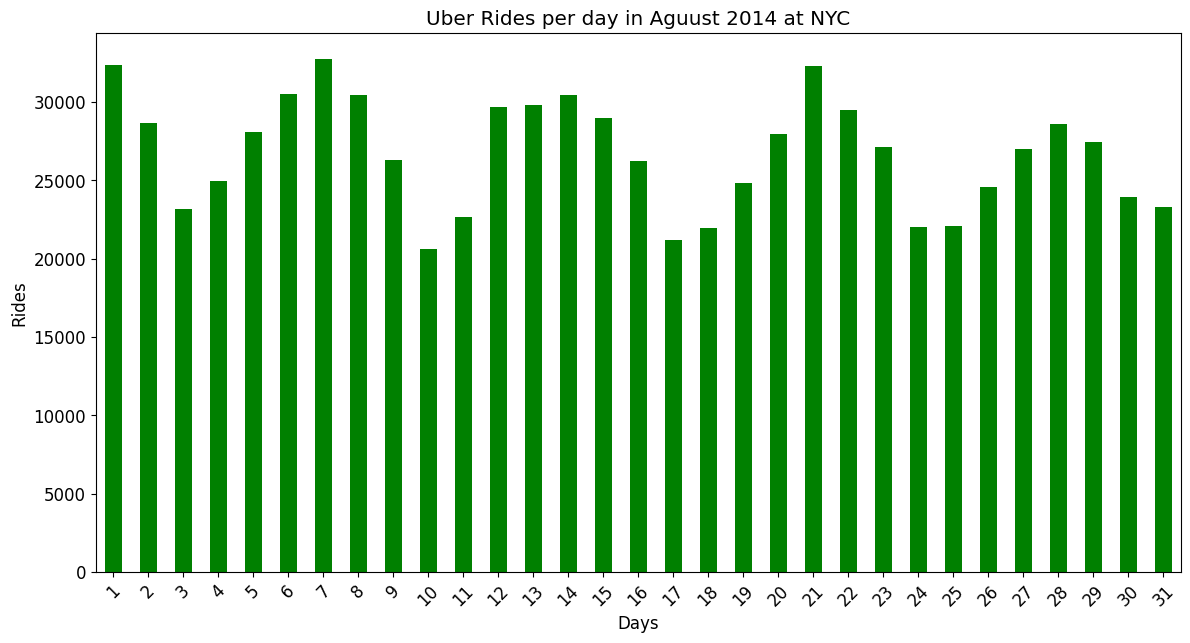

In [13]:
plt.figure(figsize=(14,7)) 
uber_data['BinnedHour'].dt.day.value_counts().sort_index().plot(kind='bar', color='green')

for item in plt.gca().get_xticklabels(): 
  
    item.set_rotation(45) 
    
plt.title('Uber Rides per day in Aguust 2014 at NYC')

plt.xlabel('Days')
plt.ylabel('Rides')
plt.show()

#### Observation 1: There is a recurring pattern in the data! The frequency of trips increases and then decreases in a repeating 

#### 2. Let us have a more closer look at it, say every 15 minutes from August 1 to August 31.

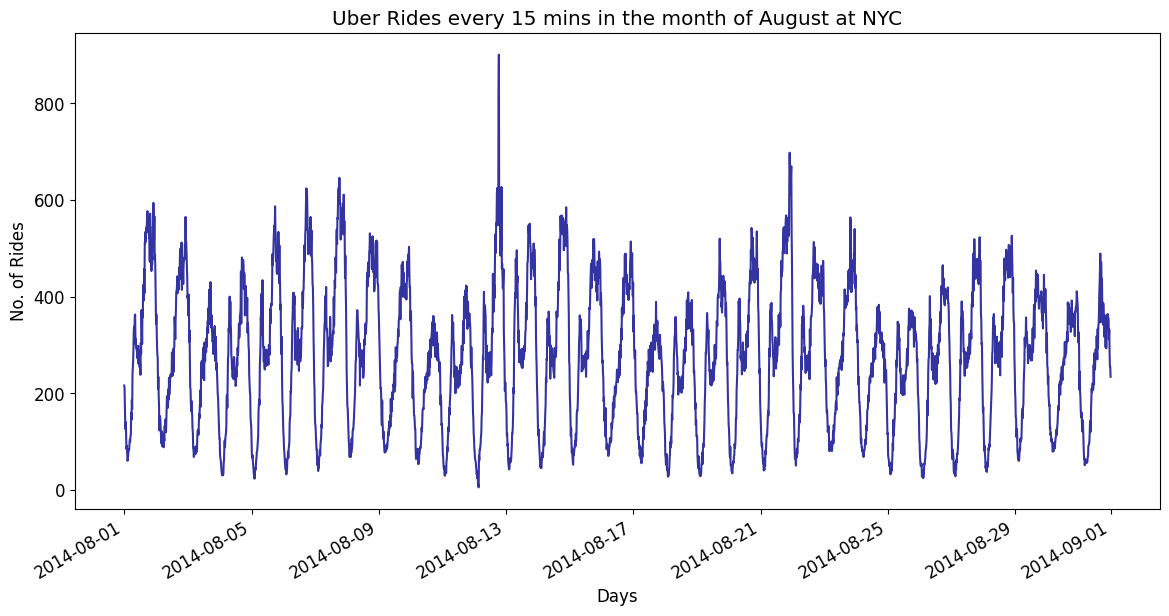

In [14]:
plt.figure(figsize=(14,7))
uber_data['BinnedHour'].value_counts().sort_index().plot(c='darkblue', alpha=0.8)
#uber_data['BinnedHour'].value_counts(): This calculates the frequency of each unique value in the 'BinnedHour' column, as explained earlier.

#.sort_index(): This sorts the resulting frequencies by the index (i.e., the unique values) in ascending order.

#.plot(c='darkblue', alpha=0.8): This plots the sorted frequencies as a line plot. 
#The c='darkblue' parameter sets the color of the line to dark blue, and the alpha=0.8 parameter sets the transparency of the line to 0.8, making it slightly transparent.


plt.title('Uber Rides every 15 mins in the month of August at NYC')
plt.xlabel('Days')
plt.ylabel('No. of Rides')
plt.show()

#### Observation 2: The underlying trend is clearly visible now. It conveys that in a day there are times when the pickups are very low and very high, and they seem to follow a pattern.

#### Q. Which times correspond to the highest and lowest peaks in the plot above?

In [15]:
display(uber_data['BinnedHour'].value_counts())




BinnedHour
2014-08-12 18:30:00    901
2014-08-12 18:15:00    816
2014-08-21 21:45:00    698
2014-08-21 23:00:00    670
2014-08-21 22:00:00    659
                      ... 
2014-08-12 02:15:00     24
2014-08-26 02:30:00     24
2014-08-05 02:15:00     23
2014-08-12 02:45:00     14
2014-08-12 03:15:00      5
Name: count, Length: 2975, dtype: int64

### This information helps to understand the distribution and frequency of different time periods (binned hours) in the 'BinnedHour' column.

Ans:

The highest peak corresponds to the time 18:30  (6:30 PM), 12th August 2014 and has a ride count of 901 and the lowest peak corresponds to the time 03:15, 12th August 2014 and has a ride count of 5.

#### 3. Lets visualize the week wise trends in the data. 
For this, we will have to map each date into its day name using a dictionary. 

In [16]:
DayMap = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
uber_data['Day'] = uber_data['BinnedHour'].dt.weekday.map(DayMap)
display(uber_data['Day'])

0         Friday
1         Friday
2         Friday
3         Friday
4         Friday
           ...  
829270    Sunday
829271    Sunday
829272    Sunday
829273    Sunday
829274    Sunday
Name: Day, Length: 829275, dtype: object

In [17]:
# Separating the date and time to other columns
uber_data['Date'] = uber_data['BinnedHour'].dt.date
uber_data['Time'] = uber_data['BinnedHour'].dt.time
display(uber_data[['Date', 'Time']])


,Date,Time
0,2014-08-01,00:00:00
1,2014-08-01,00:00:00
2,2014-08-01,00:00:00
3,2014-08-01,00:00:00
4,2014-08-01,00:00:00
...,...,...
829270,2014-08-31,23:45:00
829271,2014-08-31,23:45:00
829272,2014-08-31,23:45:00
829273,2014-08-31,23:45:00


In [18]:
# Defining ordered category of week days for easy sorting and visualization
uber_data['Day'] = pd.Categorical(uber_data['Day'], 
                                  categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                                  ordered=True)
display(uber_data['Day'])

0         Friday
1         Friday
2         Friday
3         Friday
4         Friday
           ...  
829270    Sunday
829271    Sunday
829272    Sunday
829273    Sunday
829274    Sunday
Name: Day, Length: 829275, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [19]:
weekly_data = uber_data.groupby(['Date','Day','Time']).count().dropna()\
                .rename(columns={'BinnedHour':'Rides'})['Rides'].reset_index()
weekly_data.head(10)

,Date,Day,Time,Rides
0,2014-08-01,Monday,00:00:00,0
1,2014-08-01,Monday,00:15:00,0
2,2014-08-01,Monday,00:30:00,0
3,2014-08-01,Monday,00:45:00,0
4,2014-08-01,Monday,01:00:00,0
5,2014-08-01,Monday,01:15:00,0
6,2014-08-01,Monday,01:30:00,0
7,2014-08-01,Monday,01:45:00,0
8,2014-08-01,Monday,02:00:00,0
9,2014-08-01,Monday,02:15:00,0


### We now group weekly data by days to plot total rides per week in August 2014

In [20]:
# Grouping the weekly_data daywise
daywise = weekly_data.groupby('Day').sum('Rides')
display(daywise)

,Rides
Day,
Monday,91633
Tuesday,107124
Wednesday,115256
Thursday,124117
Friday,148674
Saturday,132225
Sunday,110246


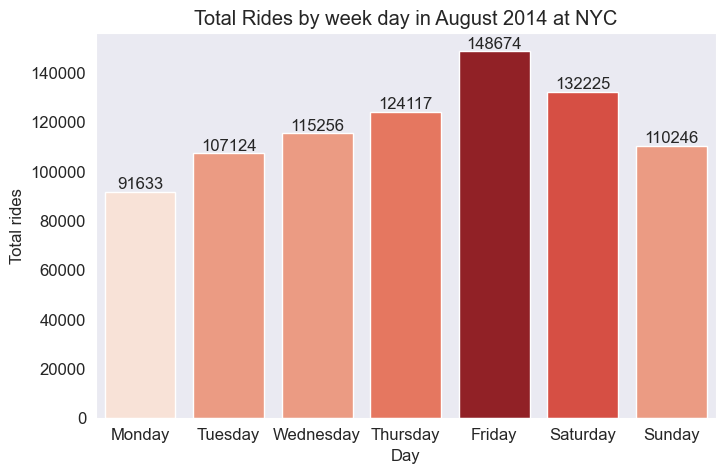

In [21]:
# Plotting the graphs for a better visualization
sns.set_style("dark")
plt.figure(figsize=(8,5))

# Creating a customized color palette for custom hue according to height of bars
vals = daywise.to_numpy().ravel()
normalized = (vals - np.min(vals)) / (np.max(vals) - np.min(vals))
indices = np.round(normalized * (len(vals) - 1)).astype(np.int32)
palette = sns.color_palette('Reds', len(vals))
colorPal = np.array(palette).take(indices, axis=0)

# Creating a bar plot
ax = sns.barplot(x = daywise.index,y= vals,palette=colorPal)
plt.ylabel('Total rides')
plt.title('Total Rides by week day in August 2014 at NYC')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2.0,rect.get_height(),int(rect.get_height()), ha='center', va='bottom')

#### Observation 3: According to the bar plot above, rides are maximum on fridays and minimum on Mondays. Mondays having the lowest number of rides since its a aday after weekend monday blues

In [22]:
weekly_data = weekly_data.groupby(['Day','Time']).mean('Rides')
display(weekly_data.head(10))

Rides
Day    Time               
Monday 00:00:00  11.032258
       00:15:00   9.000000
       00:30:00   8.032258
       00:45:00   7.225806
       01:00:00   7.225806
       01:15:00   6.064516
       01:30:00   4.612903
       01:45:00   4.161290
       02:00:00   4.000000
       02:15:00   4.645161

In [23]:

# Unstacking the data to create heatmap
weekly_data= weekly_data.unstack(level=0)
display(weekly_data)


Rides                                                          
Day          Monday    Tuesday  Wednesday   Thursday     Friday   Saturday   
Time                                                                         
00:00:00  11.032258  11.774194  16.967742  17.580645  35.225806  51.774194  \
00:15:00   9.000000   9.193548  14.064516  14.967742  30.548387  49.225806   
00:30:00   8.032258   7.645161  11.580645  13.419355  26.870968  43.774194   
00:45:00   7.225806   7.354839  10.580645  12.096774  21.419355  43.225806   
01:00:00   7.225806   7.677419  10.290323  10.870968  21.387097  38.161290   
...             ...        ...        ...        ...        ...        ...   
22:45:00  24.774194  35.225806  38.419355  62.322581  77.870968  78.032258   
23:00:00  21.451613  27.870968  32.838710  59.225806  70.967742  72.516129   
23:15:00  19.161290  24.935484  28.870968  49.741935  67.451613  65.580645   
23:30:00  15.258065  22.000000  24.064516  41.580645  62.354839  64.838710   
23:45:00  14.387097  18.838710  20.838710  34.483871  59.096774  60.483871   

                     
Day          Sunday  
Time                 
00:00:00  57.161290  
00:15:00  52.290323  
00:30:00  50.645161  
00:45:00  47.290323  
01:00:00  43.225806  
...             ...  
22:45:00  36.548387  
23:00:00  31.612903  
23:15:00  26.580645  
23:30:00  24.741935  
23:45:00  22.387097  

[96 rows x 7 columns]

### Here's another way to look at it using line graphs.

Text(0.5, 1.0, 'Heatmap of average rides in time vs. day grid')

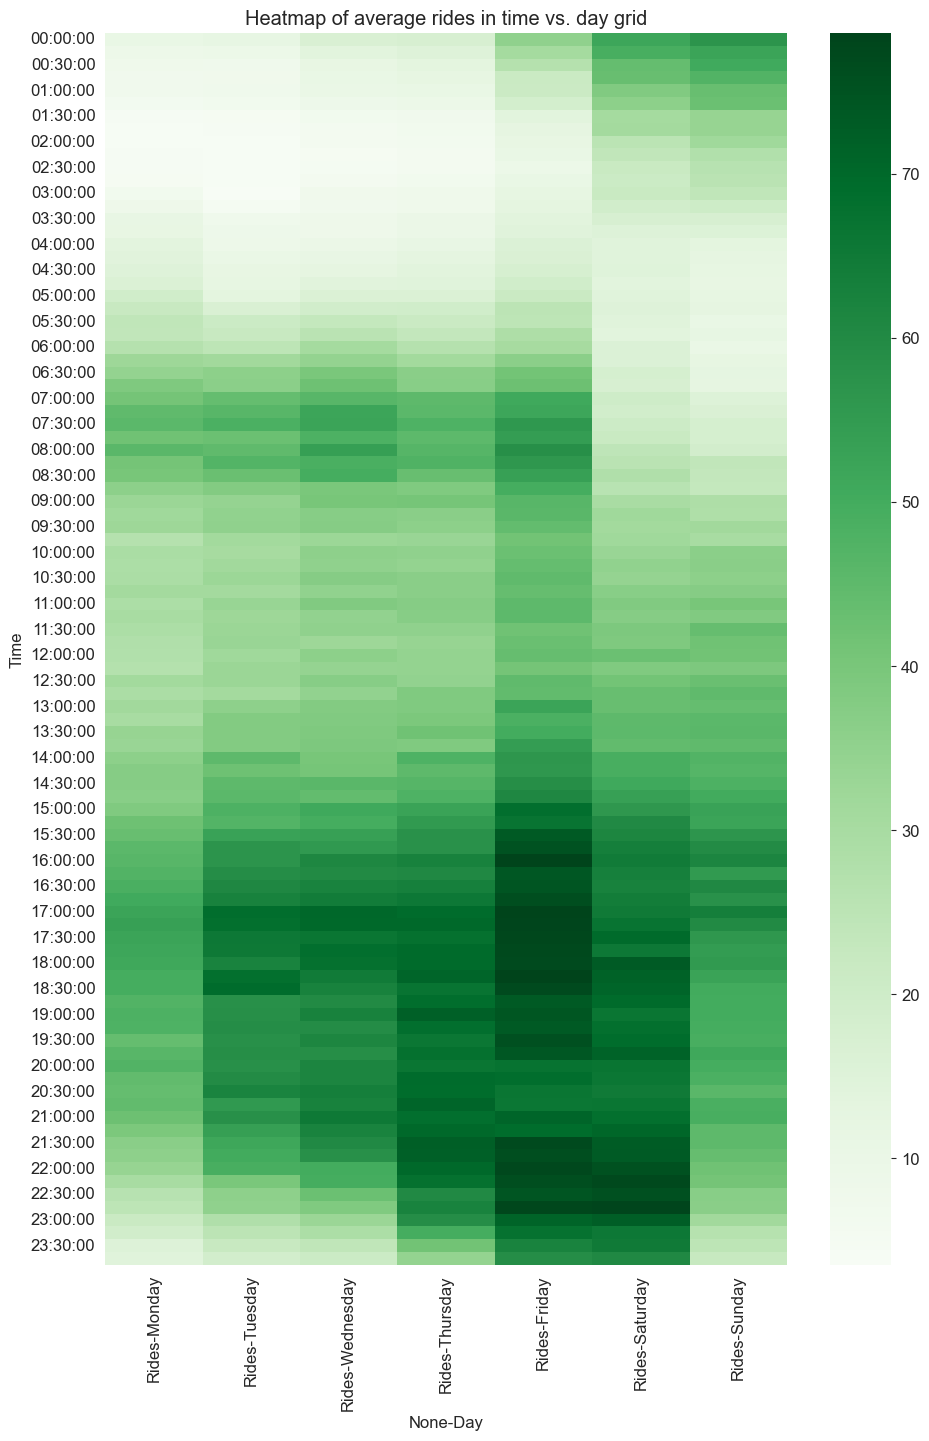

In [24]:

plt.figure(figsize=(11,16))
sns.heatmap(weekly_data, cmap='Greens')
plt.title('Heatmap of average rides in time vs. day grid')


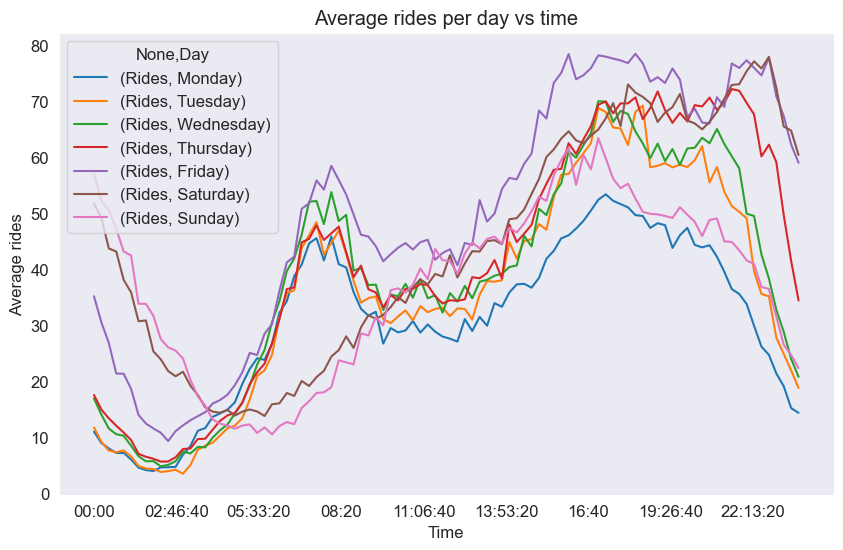

In [25]:

plt.figure(figsize=(10,6))
weekly_data.plot(ax=plt.gca())
plt.title('Average rides per day vs time')
plt.ylabel('Average rides')
plt.locator_params(axis='x', nbins=10)
plt.show()

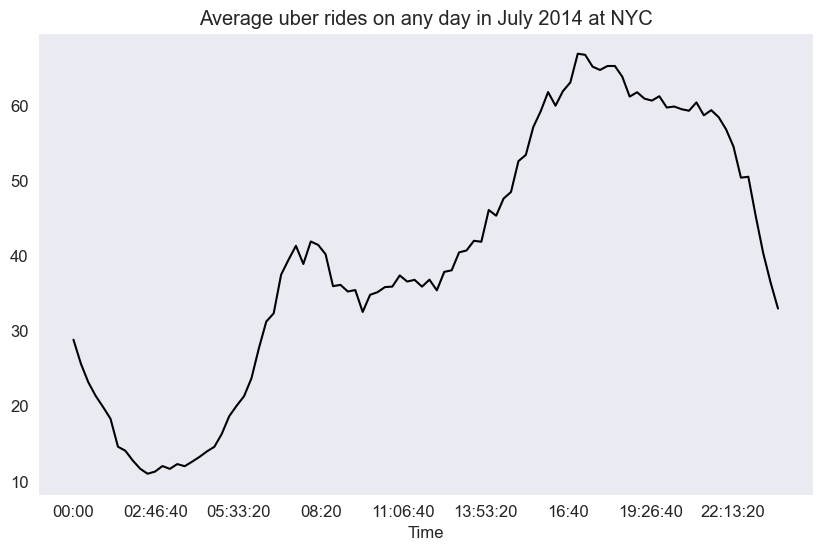

In [26]:
plt.figure(figsize=(10,6))
weekly_data.T.mean().plot(c = 'black')
plt.title('Average uber rides on any day in July 2014 at NYC')
plt.locator_params(axis='x', nbins=10)
plt.show()

#### Observation 4: This plot further confirms that the average rides on any given day is lowest around 2 AM and highest in the around 6:40 PM.

#### 4. Let's visualise the relationship between Base and total number of rides in August 2014.

In [27]:
# A mapper to map base number with its name
BaseMapper = {'B02512' : 'Unter', 'B02598' : 'Hinter', 'B02617' : 'Weiter', 'B02682' : 'Schmecken',
              'B02764' : 'Danach-NY'}

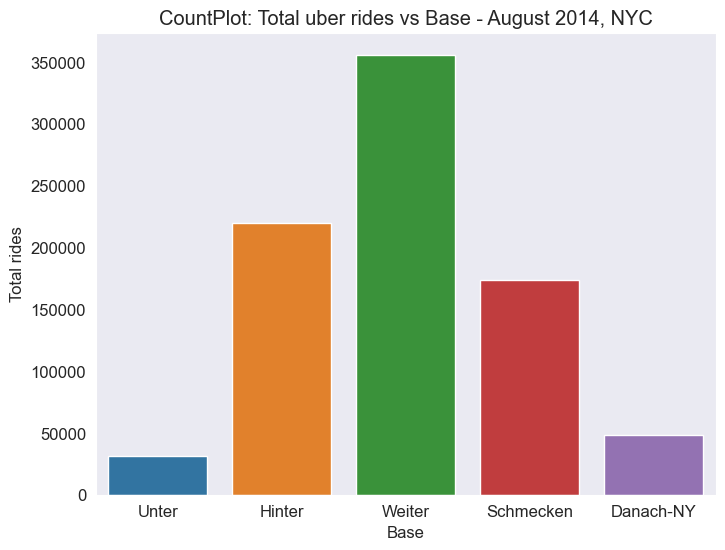

In [28]:

# Count plot of Base
plt.figure(figsize=(8,6))
sns.set_style("dark")
sns.countplot(x=uber_data['Base'].map(BaseMapper))
plt.ylabel('Total rides')
plt.title('CountPlot: Total uber rides vs Base - August 2014, NYC')
plt.show()


#### Observation 5: The above plot tells us that most uber rides originated from Weiter Base and least from Unter.